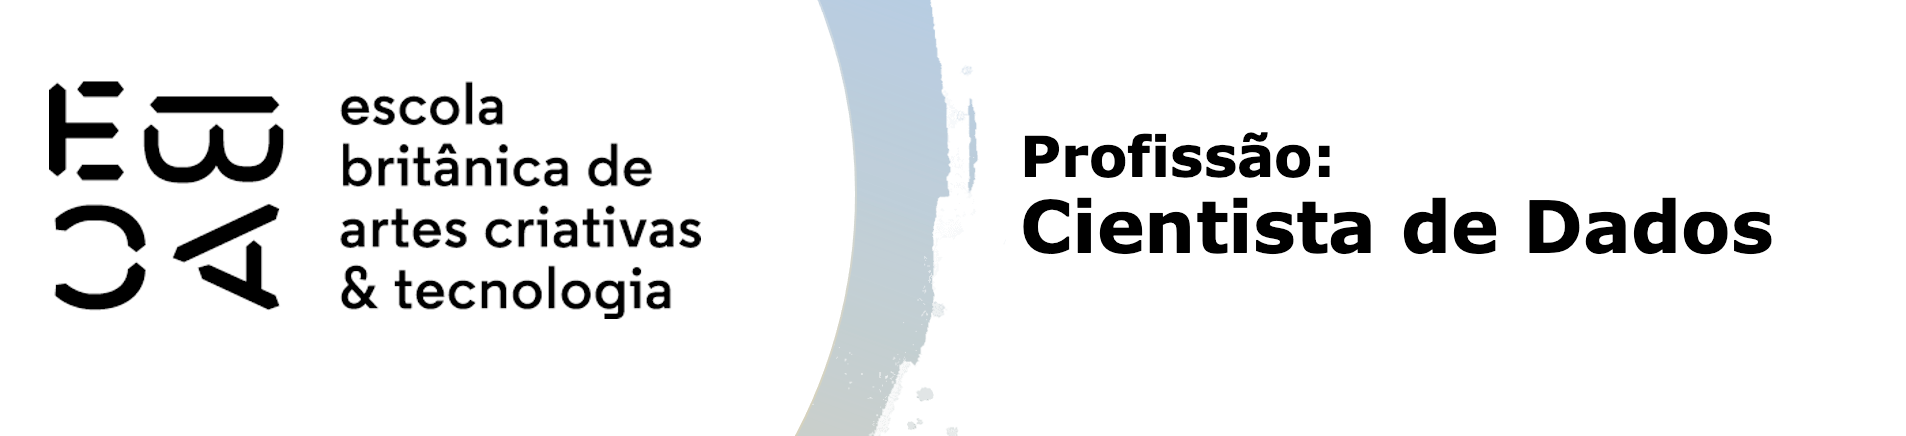

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
from scipy.interpolate         import interp1d
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats



In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)

df.info()

df

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,NaN,2.0,4084.37
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66


In [3]:
# Eliminando a coluna index devido sua irrelevancia
df.drop(columns=["index"], inplace=True)

# Substituindo valores ausentes para cada variável no DataFrame pela media dos valores
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)
df.isna().sum()

# Adicionando uma nova coluna 'renda_log' com o logaritmo natural dos valores da coluna 'renda'
df['renda_log'] = np.log(df['renda'])

# Convertendo o índice do DataFrame para o tipo datetime
df.index = pd.to_datetime(df.index)

# Imprimindo os meses presentes na base de dados
print(f'''Meses presentes na base:
{[mes for mes in df.index.unique().strftime('%b%y')]}

Três últimos meses na base:
{[mes for mes in df[df.index > (df.index.unique().max() - pd.DateOffset(months=3))].index.unique().strftime('%b%y')]}
''')

C:\Users\jfran\AppData\Local\Temp\ipykernel_9908\4257727253.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)


Meses presentes na base:
['Jan15', 'Feb15', 'Mar15', 'Apr15', 'May15', 'Jun15', 'Jul15', 'Aug15', 'Sep15', 'Oct15', 'Nov15', 'Dec15', 'Jan16', 'Feb16', 'Mar16']

Três últimos meses na base:
['Jan16', 'Feb16', 'Mar16']



In [4]:
# Criando um DataFrame de holdout (df_holdout) contendo apenas os dados dos últimos três meses da base de dados original
df_holdout = df[df.index > (df.index.unique().max() - pd.DateOffset(months=3))].copy()

# Imprimindo os meses presentes na base de holdout (df_holdout)
print(f'''Base holdout (df_holdout):
{[mes for mes in df_holdout.index.unique().strftime('%b%y')]}
''')

# Exibindo o DataFrame de holdout
df = df_holdout
df

Base holdout (df_holdout):
['Jan16', 'Feb16', 'Mar16']



,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
data_ref,,,,,,,,,,,,,
2016-01-01,F,N,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,2137.61,7.667444
2016-01-01,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.301370,4.0,13884.35,9.538518
2016-01-01,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,5.0,11042.47,9.309504
2016-01-01,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.0,1333.82,7.195802
2016-01-01,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,1.0,17633.03,9.777529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40,7.982894
2016-03-01,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,7.746165,2.0,4084.37,8.314923
2016-03-01,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66,8.375551


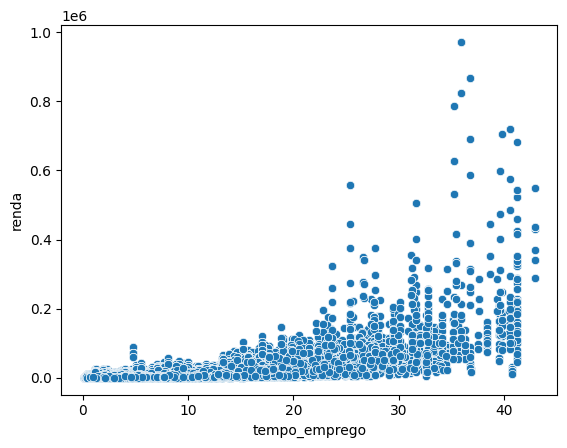

In [5]:
sns.scatterplot(y='renda', x = 'tempo_emprego', data=df);

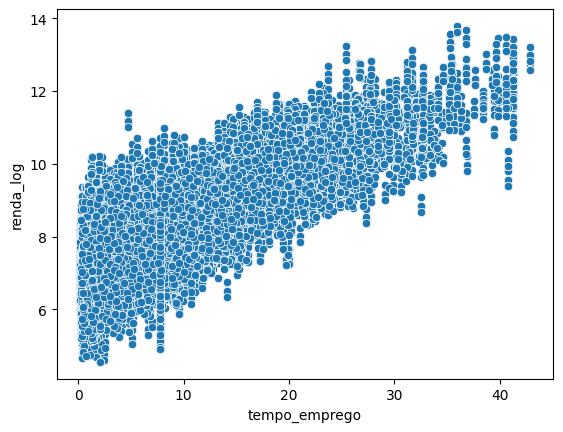

In [6]:
sns.scatterplot(y='renda_log', x = 'tempo_emprego', data=df);

In [7]:
# Regressão simples da renda pela variavel 'tempo_emprego'
reg = smf.ols('renda ~ tempo_emprego', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                 6.604e+04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:49:54   Log-Likelihood:            -1.6985e+06
No. Observations:              150000   AIC:                         3.397e+06
Df Residuals:                  149998   BIC:                         3.397e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9313.1077     83.602   -111.398      0.000   -9476.967   -9149.249
tempo_emprego  2178.8028      8.478    256.991      0.000    2162.186    2195.420
==============================================================================
Omnibus:                   308752.272   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1599323504.132
Skew:                          17.350   Prob(JB):                         0.00
Kurtosis:                     507.666   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Regressão simples agora usnado a variavel 'renda_log' 
reg = smf.ols('renda_log ~ tempo_emprego', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 1.635e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:49:54   Log-Likelihood:            -1.7066e+05
No. Observations:              150000   AIC:                         3.413e+05
Df Residuals:                  149998   BIC:                         3.413e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.0989      0.003   2252.228      0.000       7.093       7.105
tempo_emprego     0.1293      0.000    404.381      0.000       0.129       0.130
==============================================================================
Omnibus:                       13.139   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.567
Skew:                           0.008   Prob(JB):                      0.00113
Kurtosis:                       3.043   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

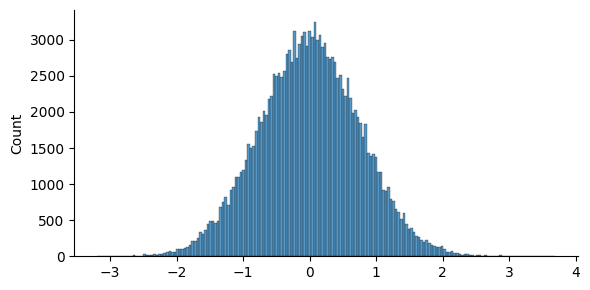

In [9]:
# Verificando se os dados tem distribuição normal 
sns.displot(reg.resid, height=3, aspect=2);

In [10]:
# tornando as variaveis categoricas em dummies
variaveis_categoricas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
df_dummies = pd.get_dummies(df, columns=variaveis_categoricas, drop_first=True)
df = df_dummies


In [11]:
# Dividir o DataFrame em Variáveis Independentes
X = df.drop(columns=['renda_log'])
y = df['renda_log']

# Verificar a correlação entre as variaveis
correlation_matrix = X.corr()
correlation_matrix


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
qtd_filhos,1.000000,-0.370326,-0.068657,0.890791,-0.043940,0.112412,0.112919,-0.015737,-0.012870,0.020830,...,0.027579,-0.021718,-0.129207,0.000073,-0.101463,-0.030939,0.037687,-0.003063,0.027985,-0.003623
idade,-0.370326,1.000000,0.249443,-0.341295,0.114009,-0.213304,-0.166611,0.133370,0.014054,-0.185649,...,-0.150051,0.053828,-0.067053,-0.059812,0.226568,0.157411,-0.187103,-0.018322,-0.007071,0.005880
tempo_emprego,-0.068657,0.249443,1.000000,-0.060649,0.552902,-0.129478,-0.071717,0.007312,0.010588,-0.096179,...,-0.042129,0.016265,-0.014007,-0.018325,0.024637,0.049965,-0.071981,-0.024854,0.017406,0.021367
qt_pessoas_residencia,0.890791,-0.341295,-0.060649,1.000000,-0.052157,0.148956,0.160597,-0.017965,-0.005162,0.017428,...,0.017781,-0.227975,-0.425533,0.070726,-0.262238,-0.017086,0.027796,-0.000788,0.023474,-0.006413
renda,-0.043940,0.114009,0.552902,-0.052157,1.000000,-0.082008,-0.043580,0.032214,-0.002301,-0.016436,...,-0.006162,0.013921,0.037428,-0.011212,-0.003573,0.024901,-0.029931,-0.008235,0.010657,0.000031
sexo_M,0.112412,-0.213304,-0.129478,0.148956,-0.082008,1.000000,0.367579,-0.055747,-0.015347,0.017720,...,0.022930,-0.059065,-0.033838,-0.027072,-0.138566,-0.063991,0.053764,0.020370,0.055382,-0.020429
posse_de_veiculo_S,0.112919,-0.166611,-0.071717,0.160597,-0.043580,0.367579,1.000000,-0.028143,-0.017532,0.045258,...,0.021351,-0.075046,-0.081717,-0.037343,-0.090033,-0.023539,0.021904,0.031580,0.030696,-0.017795
posse_de_imovel_S,-0.015737,0.133370,0.007312,-0.017965,0.032214,-0.055747,-0.028143,1.000000,0.015365,-0.015046,...,-0.045247,-0.020400,0.004712,-0.032112,0.040470,0.203133,-0.156978,-0.022864,-0.039796,-0.120090
tipo_renda_Bolsista,-0.012870,0.014054,0.010588,-0.005162,-0.002301,-0.015347,-0.017532,0.015365,1.000000,-0.012017,...,-0.004417,-0.005355,-0.008224,-0.006374,-0.004567,0.007358,-0.004721,-0.001454,-0.001862,-0.003923
tipo_renda_Empresário,0.020830,-0.185649,-0.096179,0.017428,-0.016436,0.017720,0.045258,-0.015046,-0.012017,1.000000,...,0.047618,0.012781,0.035387,0.030694,-0.075249,-0.009204,0.016226,-0.023200,0.010027,-0.002626


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialize o modelo
model = LinearRegression()

# Treine o modelo
model.fit(X_train, y_train)

# Faça previsões
y_pred = model.predict(X_test)

# Avalie o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {round(r2, 3)*100}%')


Erro Quadrático Médio (MSE): 0.49651716230825865
Coeficiente de Determinação (R²): 58.4%


In [13]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                               Coefficient
qtd_filhos                       -0.167483
idade                             0.003297
tempo_emprego                     0.107660
qt_pessoas_residencia             0.177118
renda                             0.000010
sexo_M                            0.141112
posse_de_veiculo_S                0.009641
posse_de_imovel_S                 0.169118
tipo_renda_Bolsista              -0.319456
tipo_renda_Empresário             0.140942
tipo_renda_Pensionista           -0.240078
tipo_renda_Servidor público       0.129065
educacao_Médio                    0.020506
educacao_Pós graduação            0.124848
educacao_Superior completo        0.110478
educacao_Superior incompleto      0.032890
estado_civil_Separado             0.203091
estado_civil_Solteiro             0.152779
estado_civil_União                0.012854
estado_civil_Viúvo                0.200622
tipo_residencia_Casa             -0.058630
tipo_residencia_Com os pais      -0.036626
tipo_reside

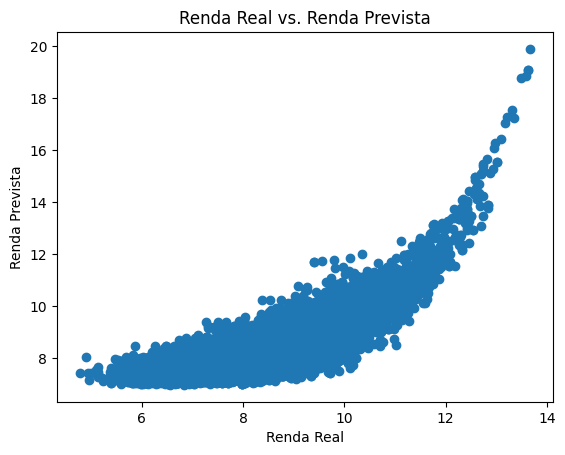

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Renda Real")
plt.ylabel("Renda Prevista")
plt.title("Renda Real vs. Renda Prevista")
plt.show()


## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

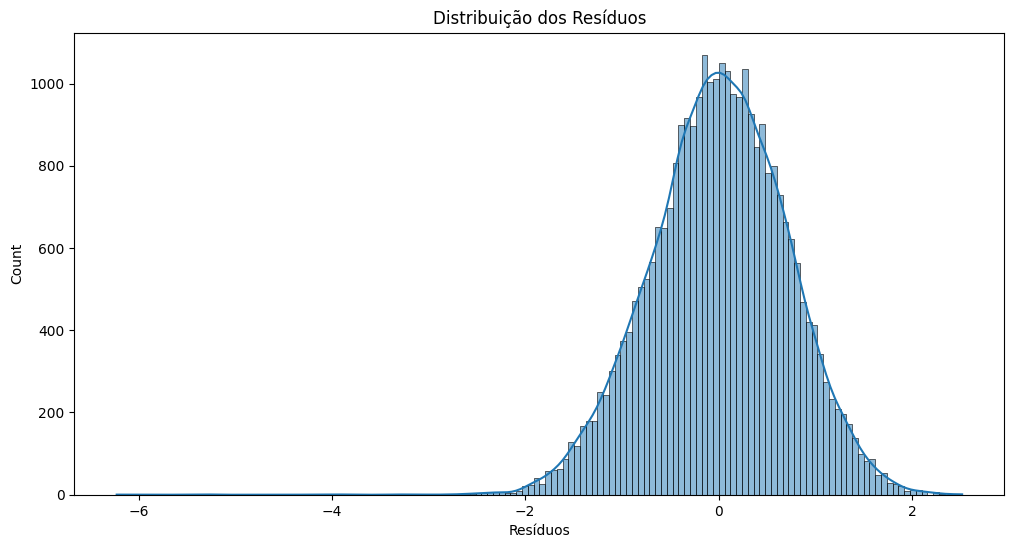

In [15]:
# Verificando se os dados tem distribuição normal 
# Calcular os resíduos
residuals = y_test - y_pred

# Histograma dos resíduos
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Resíduos')
plt.title('Distribuição dos Resíduos')
plt.show()

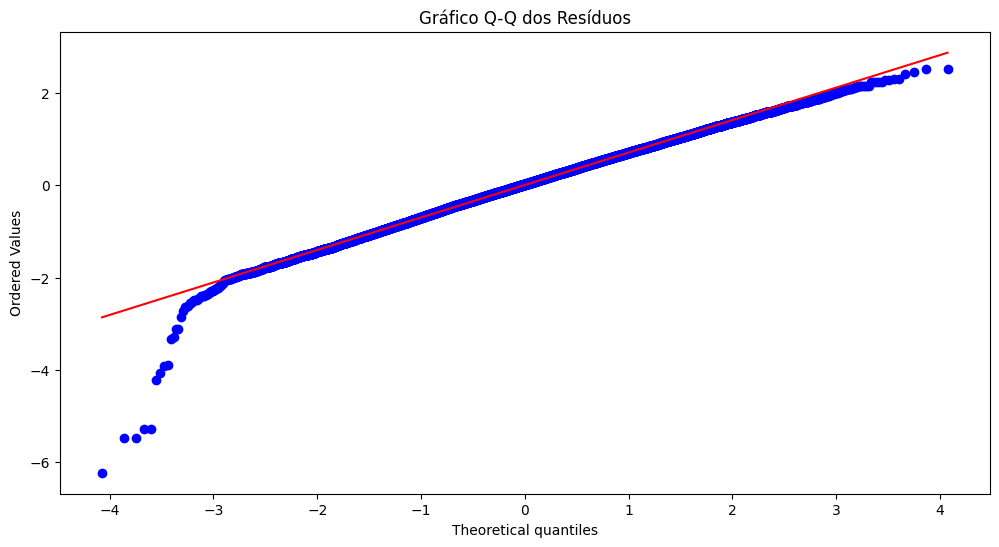

In [16]:
# Gráfico Q-Q
plt.figure(figsize=(12, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

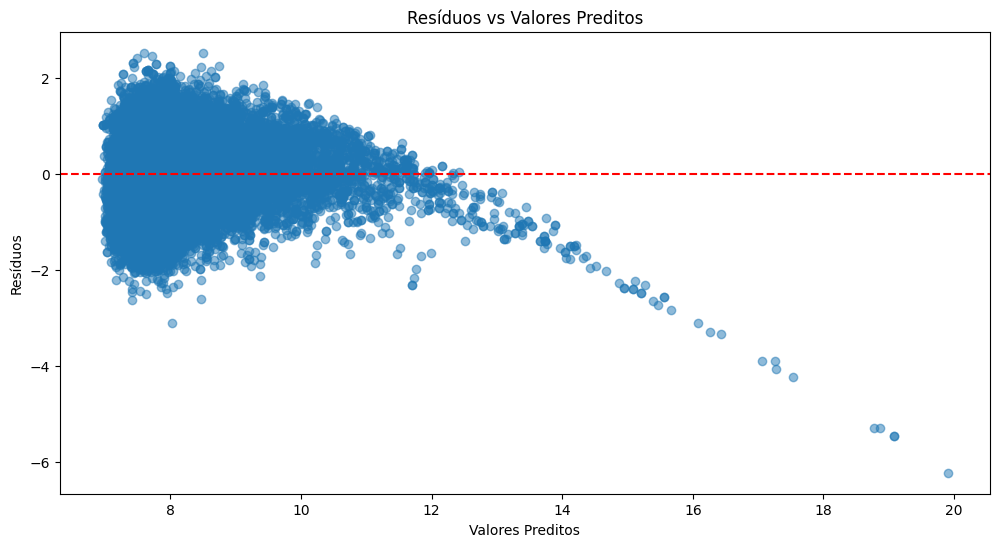

In [17]:
# Resíduos vs Valores Preditos
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Preditos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


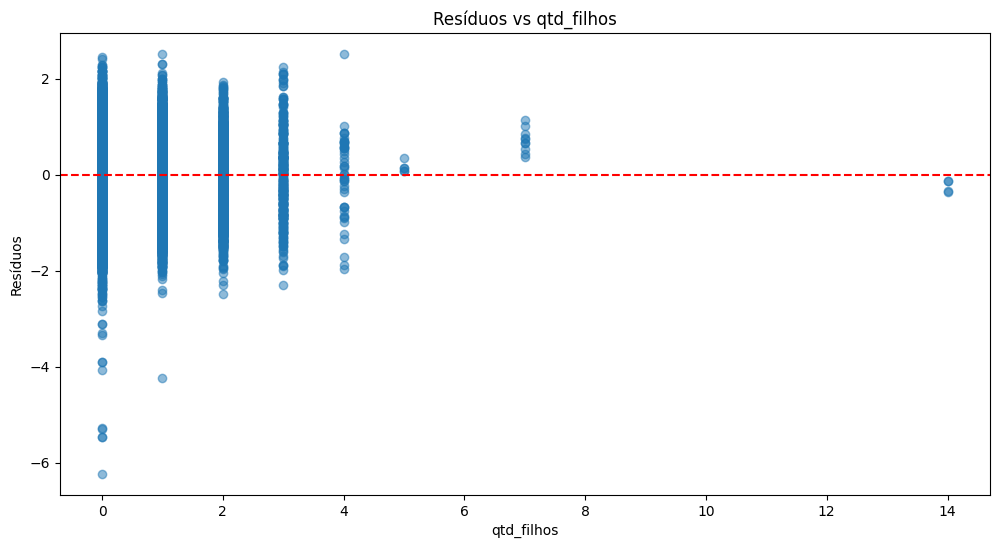

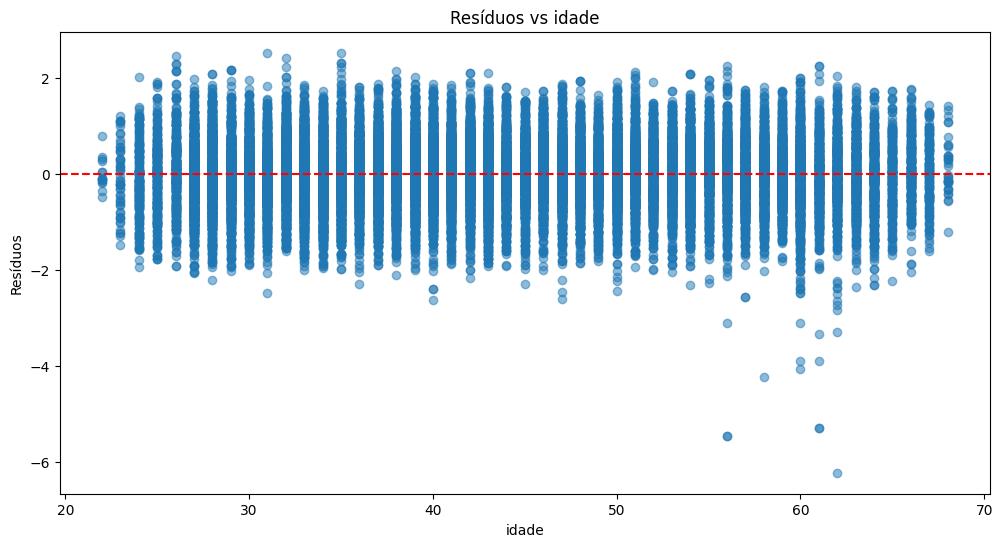

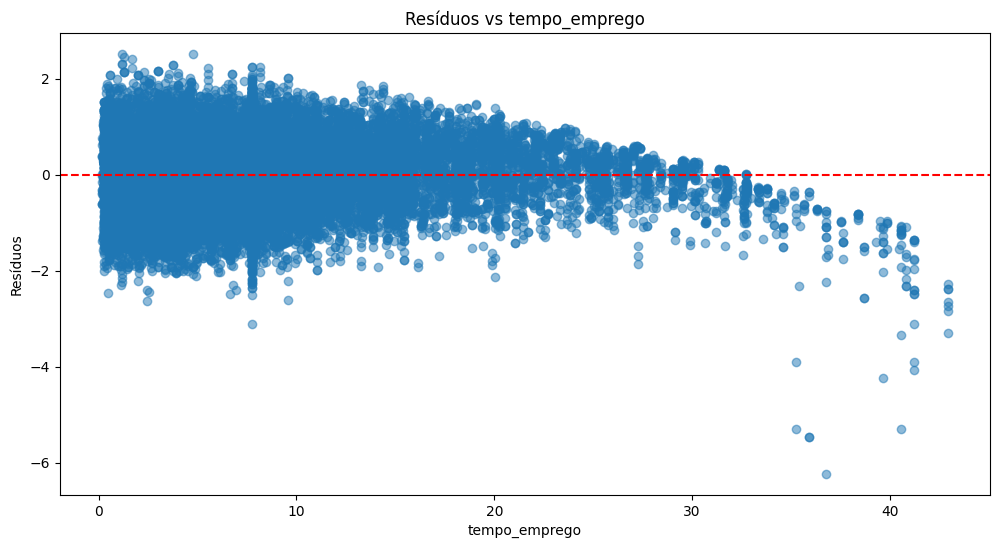

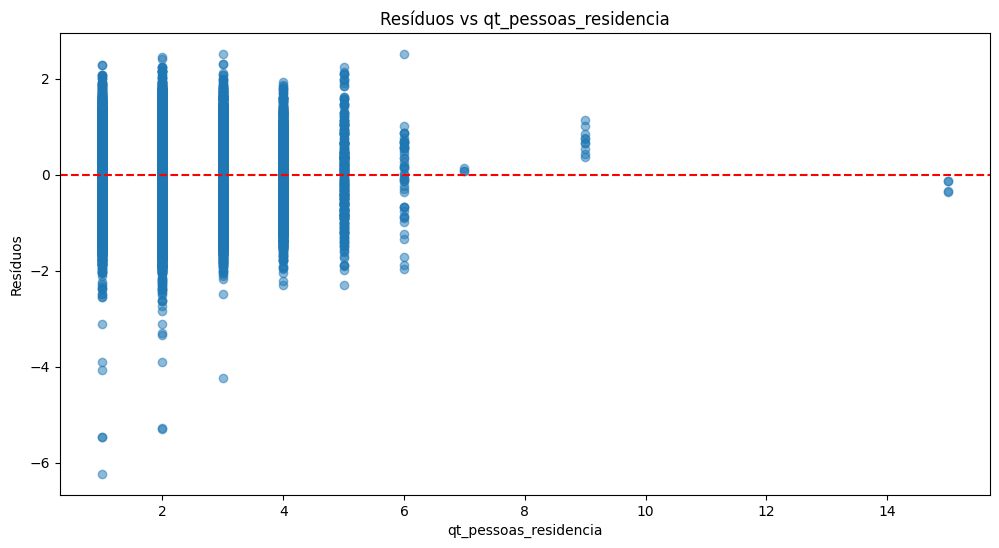

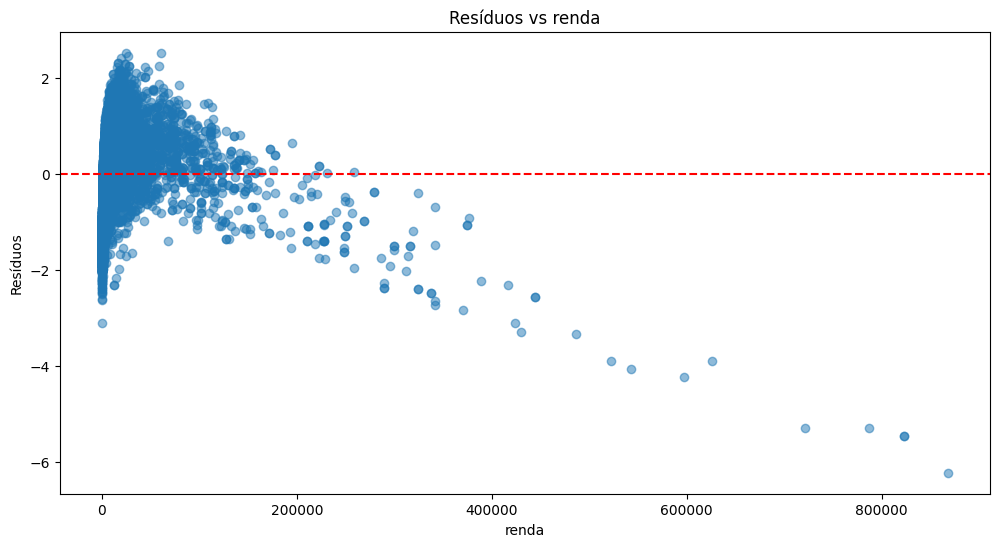

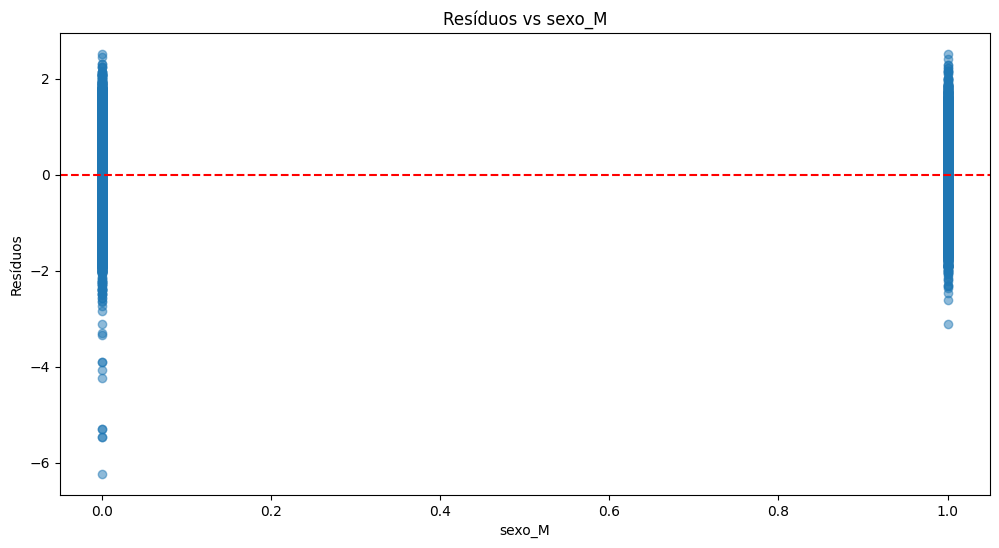

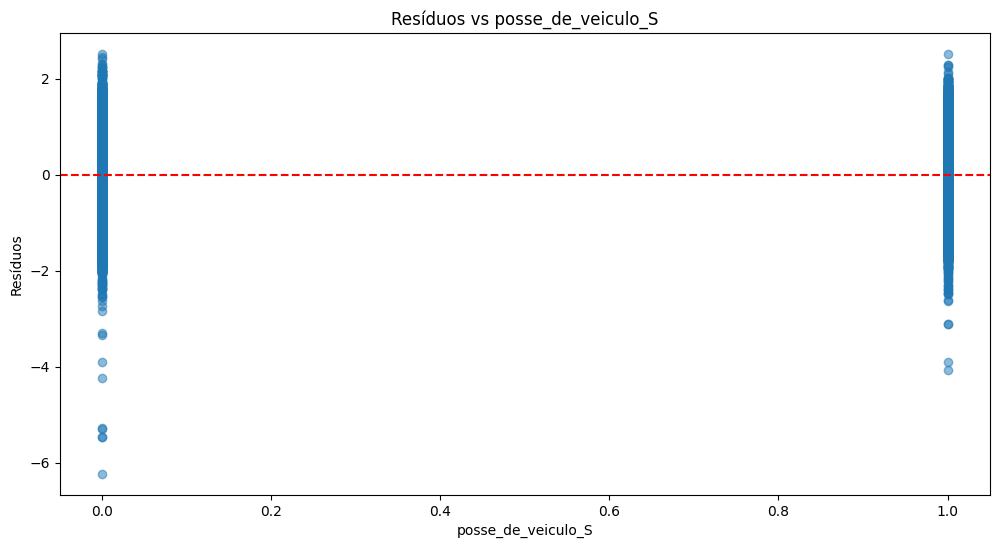

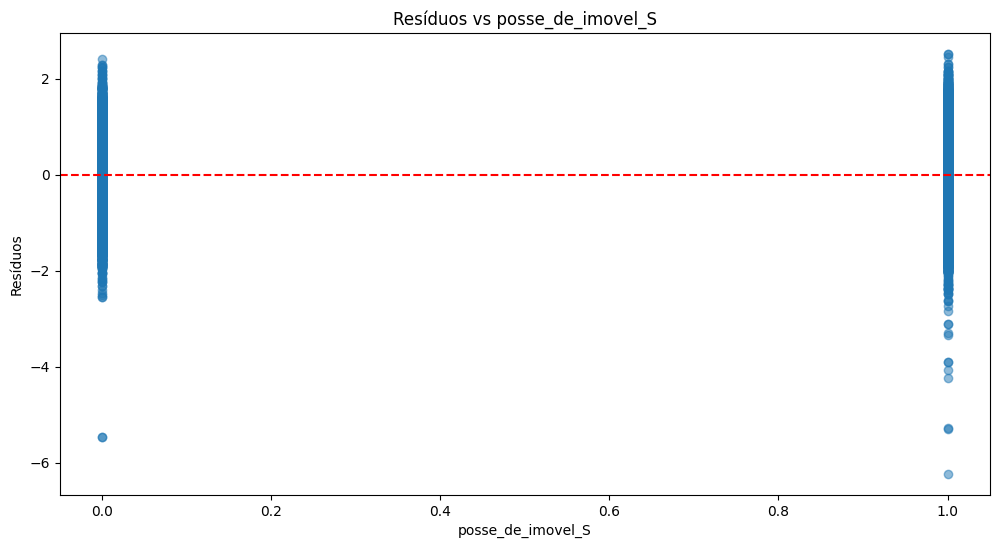

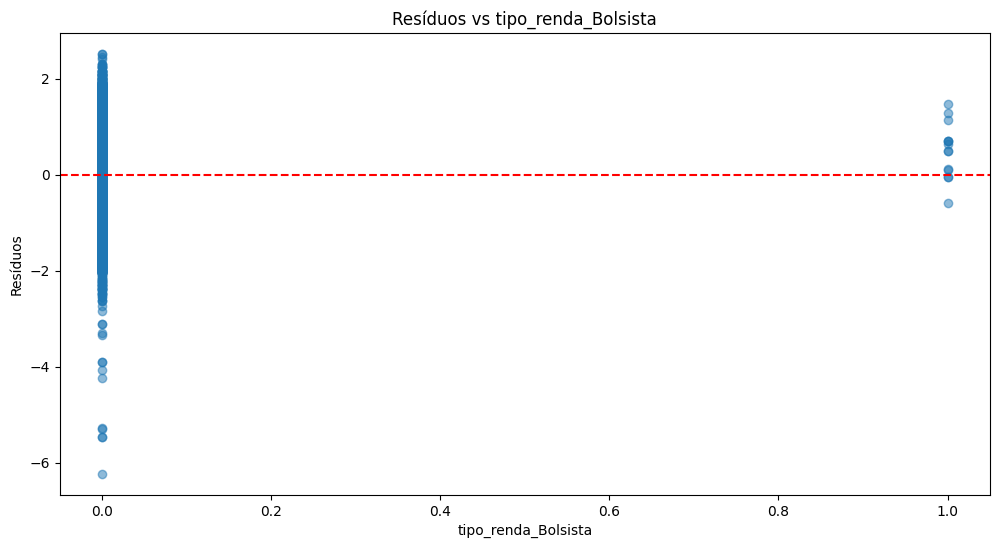

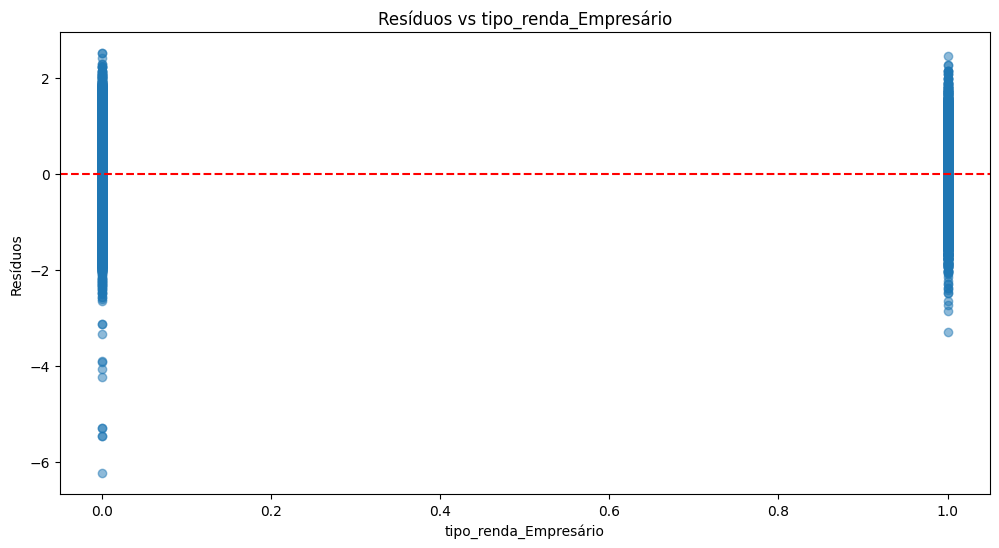

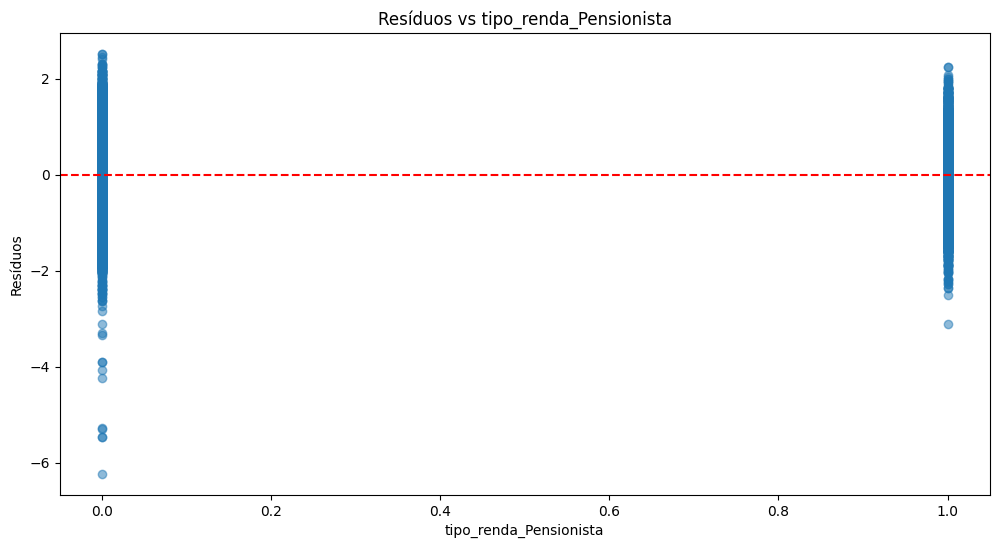

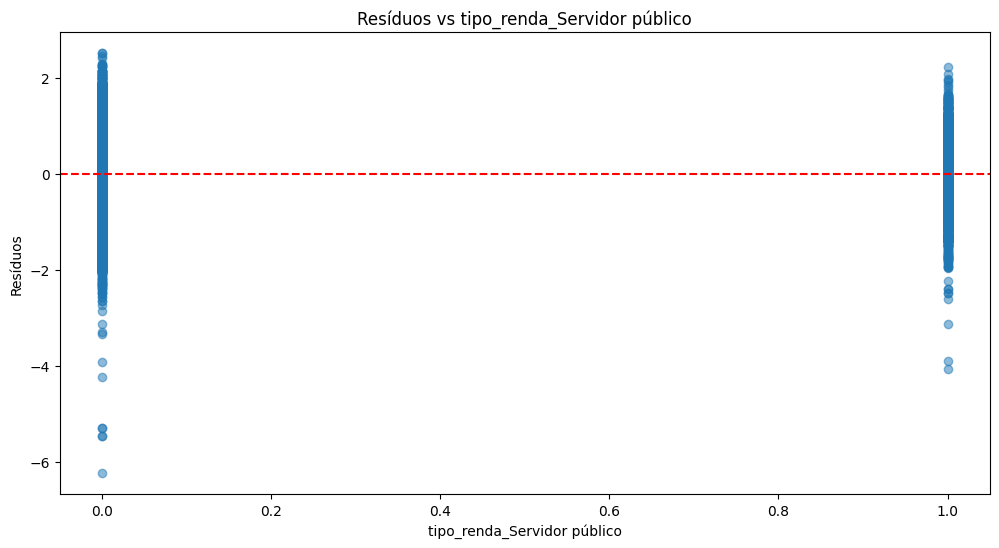

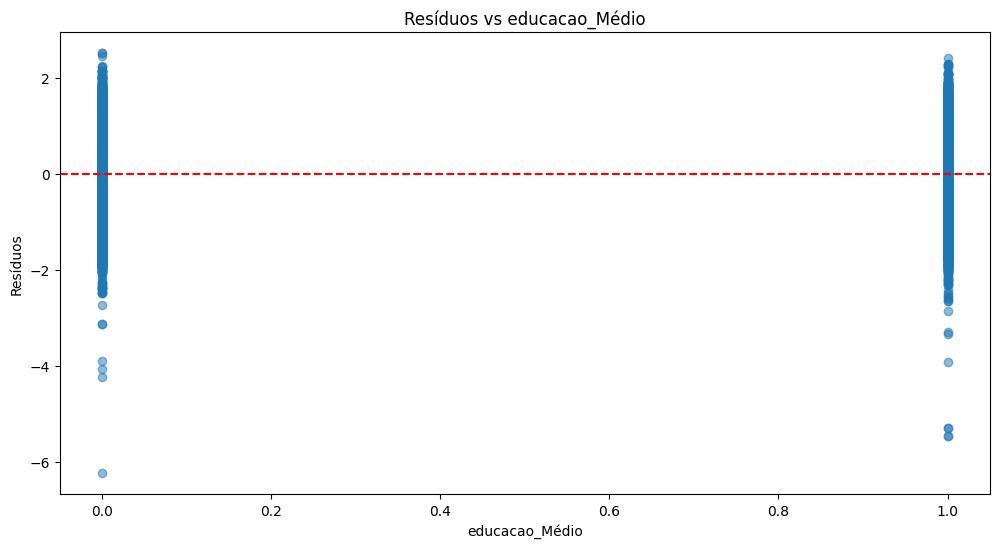

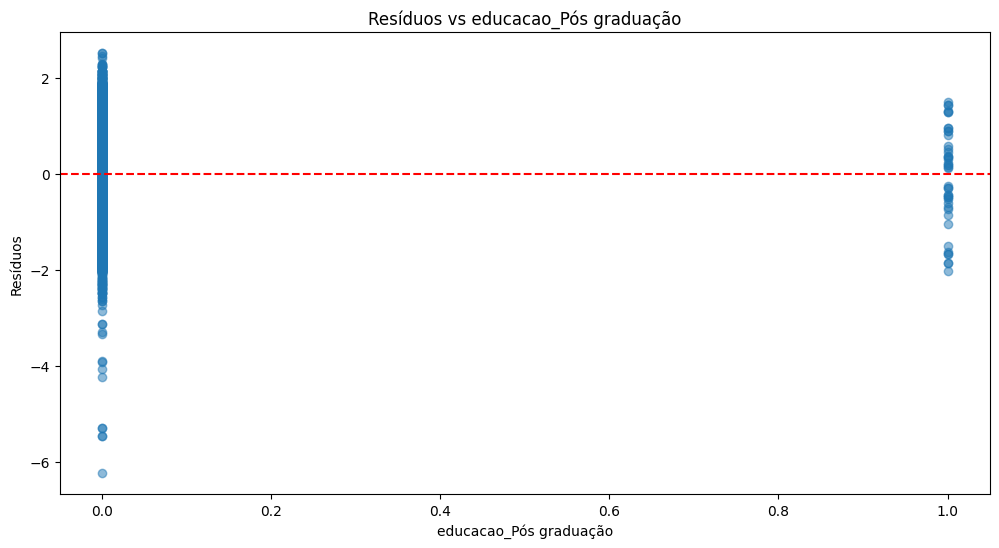

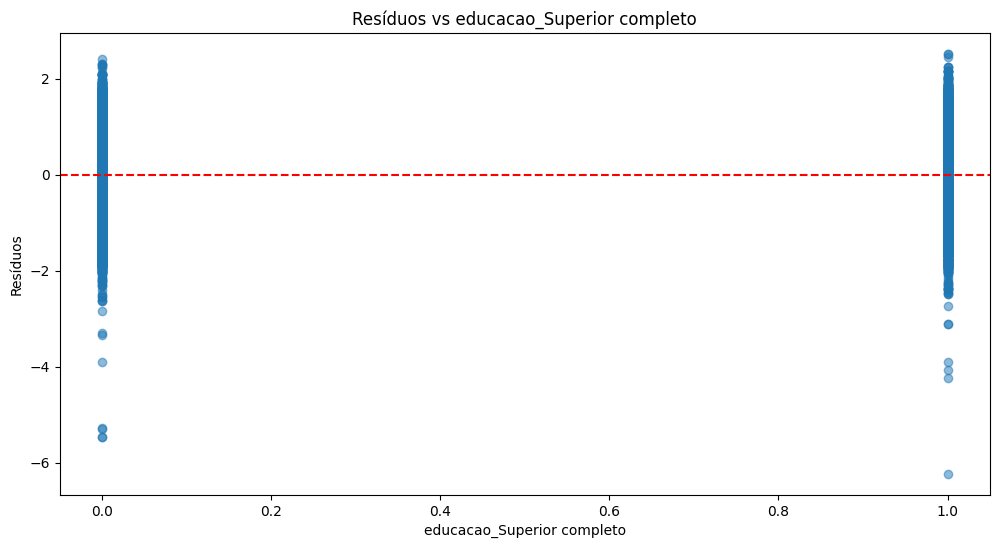

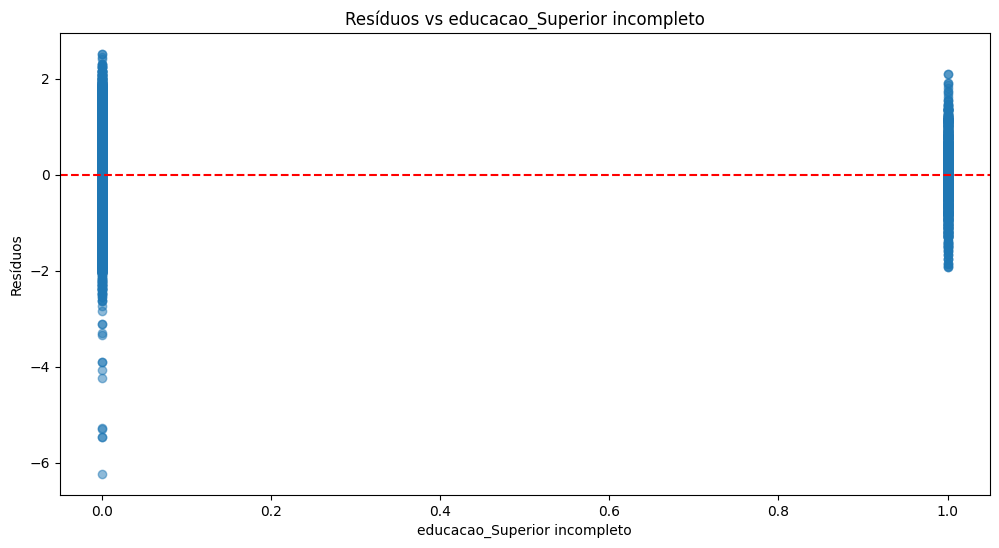

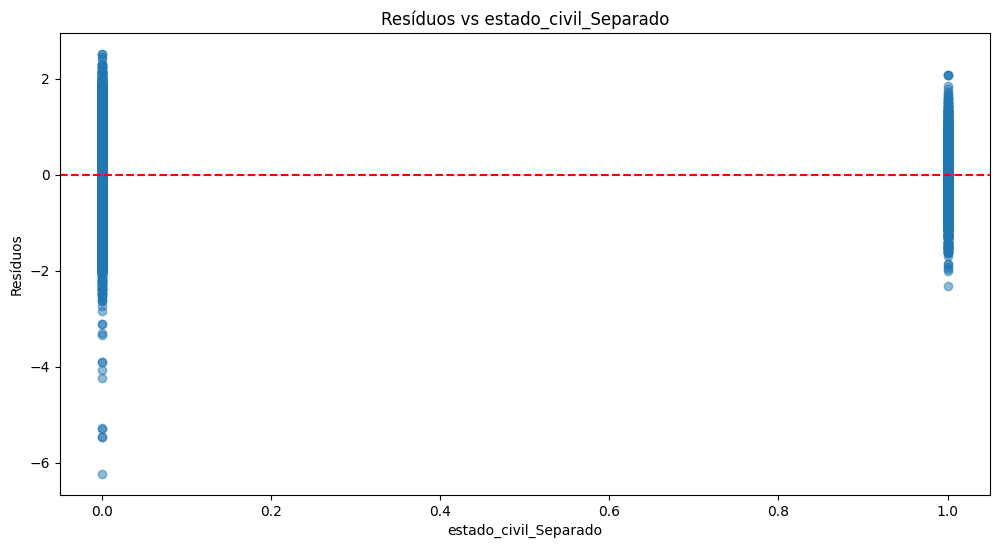

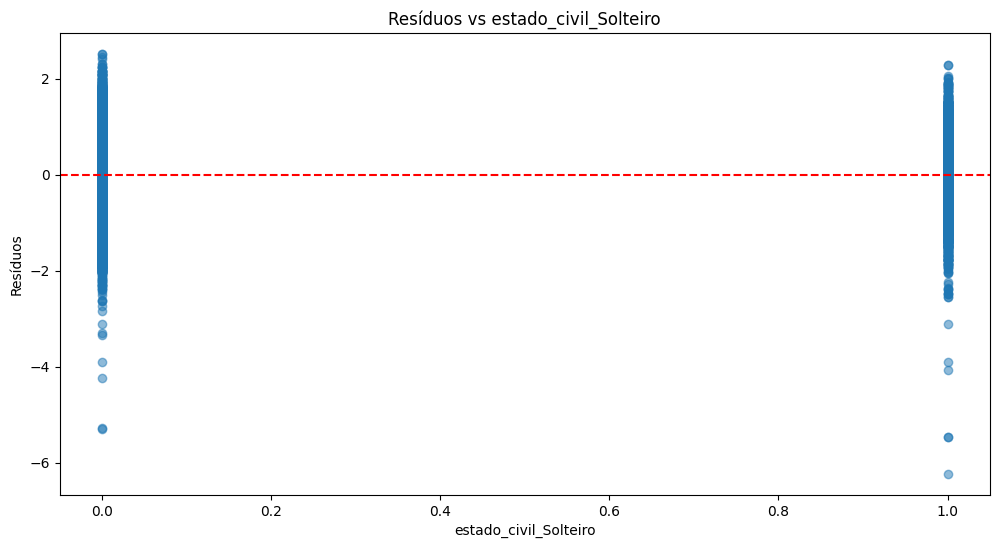

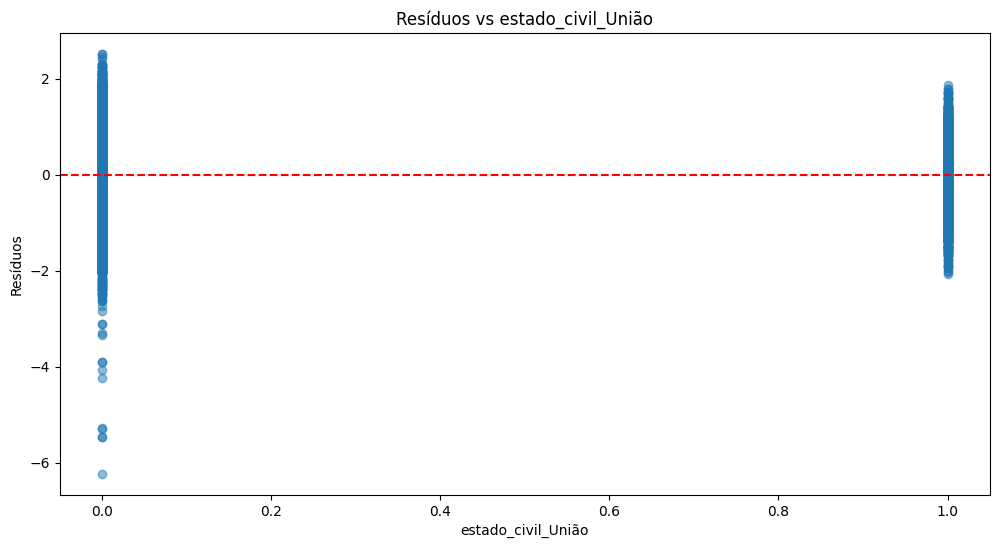

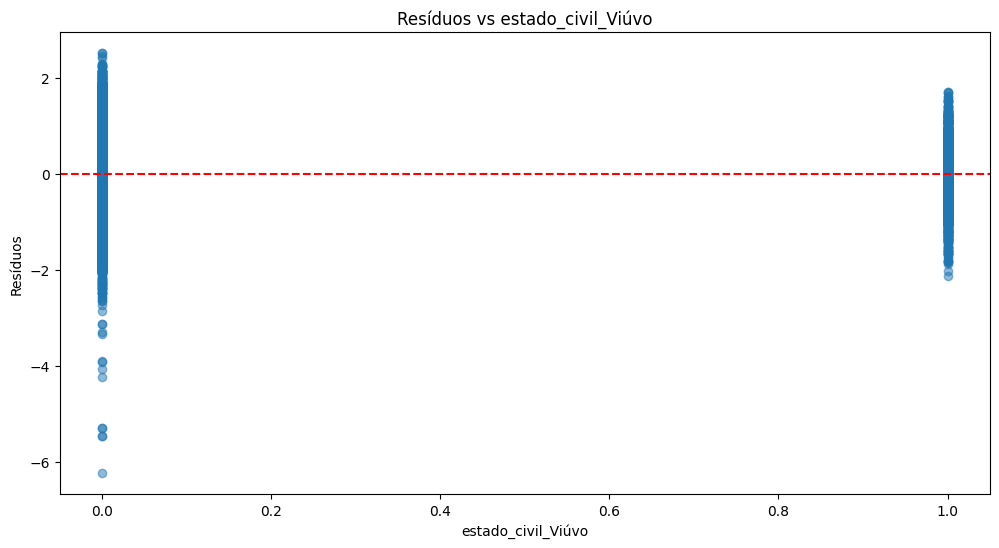

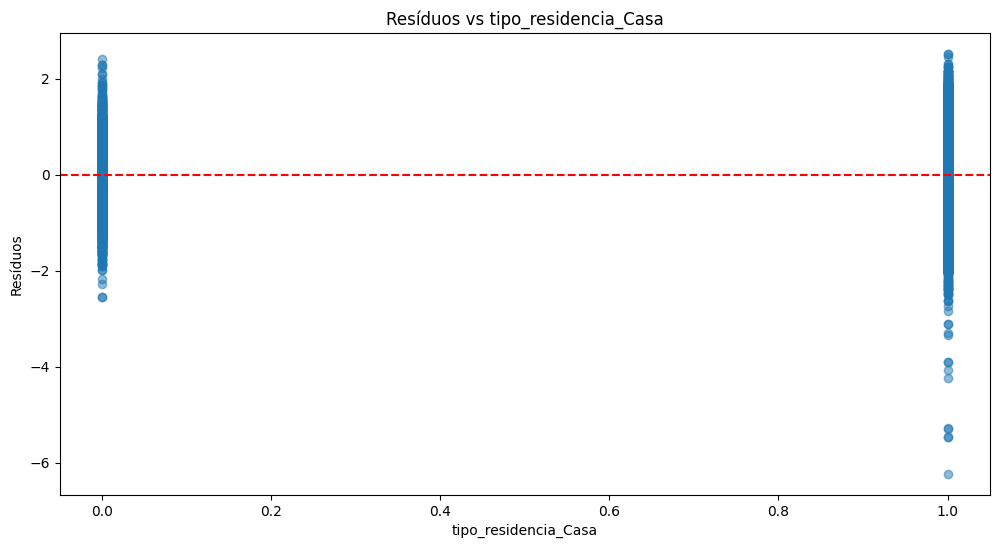

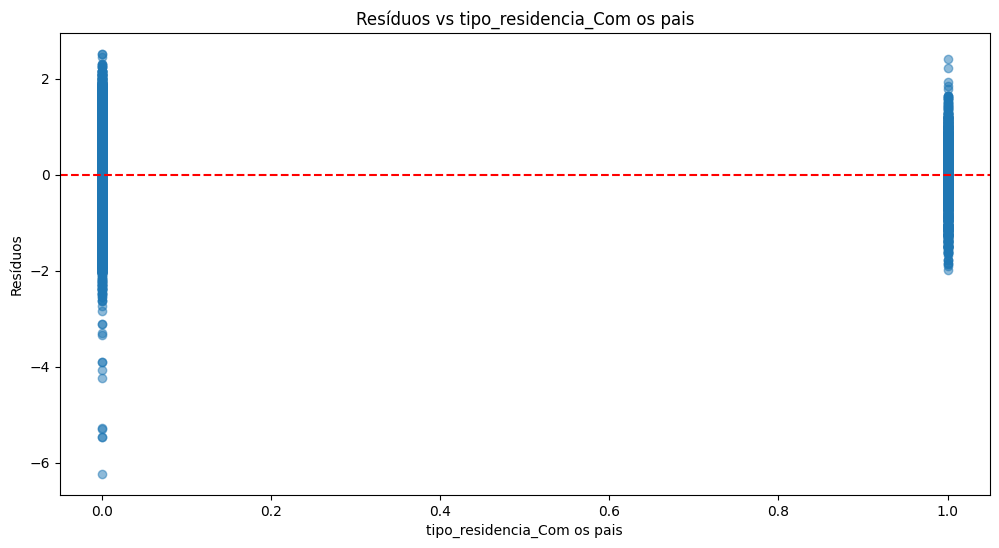

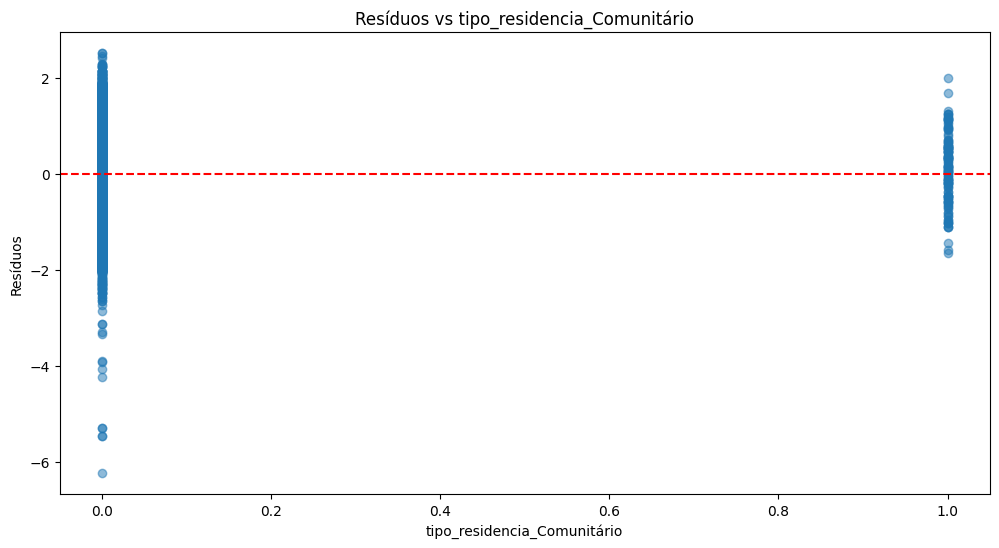

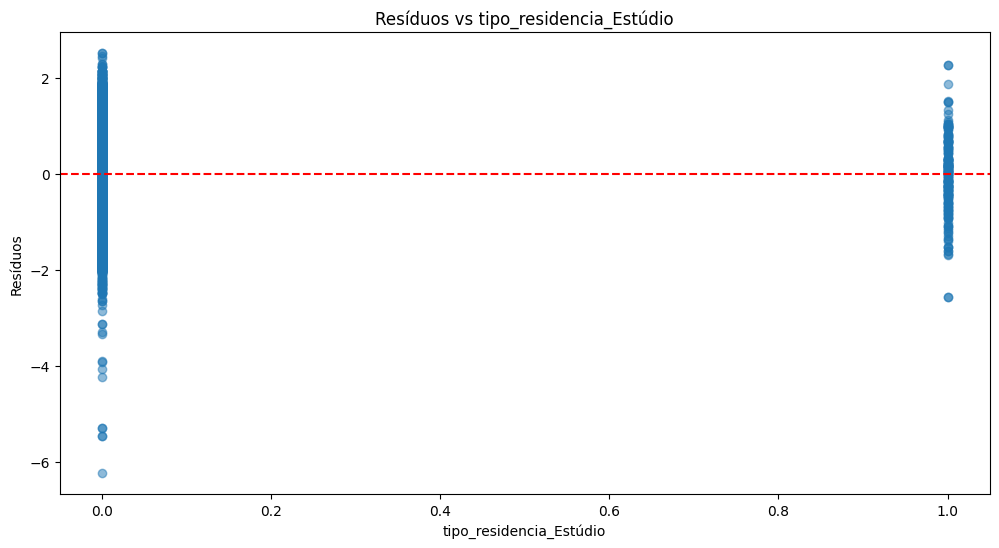

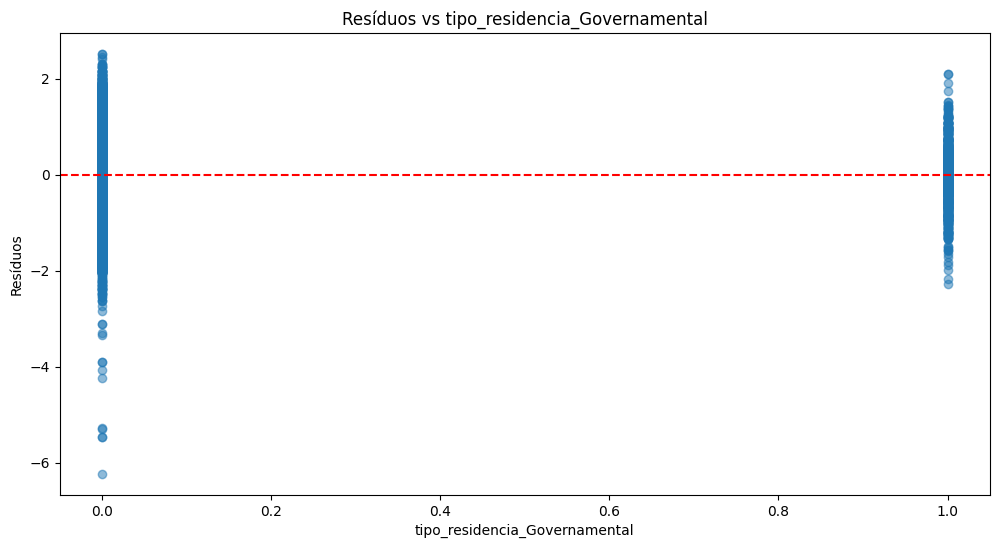

In [18]:
# Calcule os resíduos no conjunto de teste
residuals = y_test - y_pred

# Adicione os resíduos ao DataFrame de teste para garantir o alinhamento
test_data = X_test.copy()
test_data['residuals'] = residuals

# Plotar resíduos vs cada variável independente
for col in X_test.columns:
    plt.figure(figsize=(12, 6))
    plt.scatter(test_data[col], test_data['residuals'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Resíduos')
    plt.title(f'Resíduos vs {col}')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

In [19]:
# Extraindo o mês para o conjunto de teste
df_test = df.loc[X_test.index]
df_test['residuals'] = residuals

# Plotar resíduos por mês
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_test.index.month, y='residuals', data=df_test)
plt.xlabel('Mês')
plt.ylabel('Resíduos')
plt.title('Resíduos por Mês')
plt.show()


MemoryError: Unable to allocate 19.5 GiB for an array with shape (2621440000,) and data type int64

In [ ]:
# Se o índice temporal está no DataFrame original, extraia o mês para o conjunto de teste
df_test = df.loc[X_test.index]
df_test['residuals'] = residuals

# Amostra de 1% dos dados
df_sample = df.sample(frac=0.01, random_state=42)

# Certifique-se de aplicar a mesma amostragem a X_test e residuals, se necessário
df_test_sample = df_sample.loc[X_test.index]
df_test_sample['residuals'] = residuals

# Filtrar dados para um período específico, se aplicável
df_filtered = df[df['data_column'] < some_threshold]


# Amostrar 10% dos dados ( Pois a atotalidade dos dados e um valor muito alto e a maquina tem dificuldade de processar)
#df_sample = df_test.sample(frac=0.1, random_state=42)

# Calcular média e variância dos resíduos por mês
monthly_stats = df_test.groupby(df_test.index.month)['residuals'].agg(['mean', 'var']).reset_index()
monthly_stats.columns = ['Month', 'Mean Residuals', 'Variance Residuals']

# Plotar média dos resíduos por mês
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Mean Residuals', data=monthly_stats)
plt.xlabel('Mês')
plt.ylabel('Média dos Resíduos')
plt.title('Média dos Resíduos por Mês')
plt.show()

# Plotar variância dos resíduos por mês
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Variance Residuals', data=monthly_stats)
plt.xlabel('Mês')
plt.ylabel('Variância dos Resíduos')
plt.title('Variância dos Resíduos por Mês')
plt.show()


MemoryError: Unable to allocate 9.77 GiB for an array with shape (1310720000,) and data type int64

In [ ]:
print("Tamanho dos resíduos:", len(residuals))
print("Tamanho de X_test:", len(X_test))
print("Tamanho de X_test[col]:", len(X_test[col]))

print(X_test.head())
residuals.head()


Tamanho dos resíduos: 30000
Tamanho de X_test: 30000
Tamanho de X_test[col]: 30000
            qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia     renda  \
data_ref                                                                        
2016-02-01           1     34      14.619178                    2.0   4349.39   
2016-01-01           0     58       7.746165                    2.0   1750.54   
2016-03-01           0     40       5.717808                    2.0   4682.43   
2016-03-01           0     24       1.641096                    1.0    683.34   
2016-03-01           0     46      20.117808                    2.0  30744.47   

            sexo_M  posse_de_veiculo_S  posse_de_imovel_S  \
data_ref                                                    
2016-02-01   False               False              False   
2016-01-01   False               False               True   
2016-03-01    True               False              False   
2016-03-01    True               False      

data_ref
2016-02-01   -0.187516
2016-01-01   -0.426019
2016-03-01    0.684184
2016-03-01   -0.965541
2016-03-01    0.707518
Name: renda_log, dtype: float64

In [ ]:
# Certifique-se de que o índice do DataFrame é do tipo datetime
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(8, 6))
plt.scatter(df.index, residuos, alpha=0.5)
plt.xlabel("Data")
plt.ylabel("Resíduos")
plt.title("Resíduos versus Tempo")
plt.axhline(0, color='red', linestyle='--')
plt.show()


NameError: name 'residuos' is not defined

<Figure size 800x600 with 0 Axes>

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

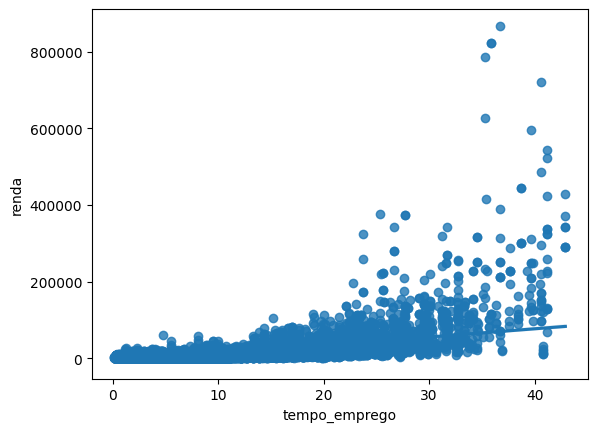

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x = 'tempo_emprego', y = 'renda', data=test_data, ax=ax);

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x = 'tempo_emprego', y = 'renda_log', data=df, ax=ax);

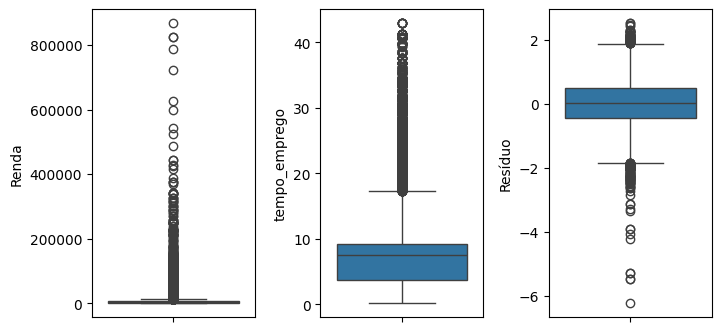

In [37]:
fix, ax = plt.subplots(1, 3, figsize=(8,4))
plt.subplots_adjust(wspace=.4, hspace=0)

sns.boxplot(y = 'renda_log',data=df, ax=ax[0])
sns.boxplot(y = 'tempo_emprego',data=test_data, ax=ax[1])
sns.boxplot(y = 'residuals' ,data=test_data, ax=ax[2]);

ax[0].set_ylabel('Renda')
ax[2].set_ylabel('Tempo de emprego')
ax[2].set_ylabel('Resíduo');

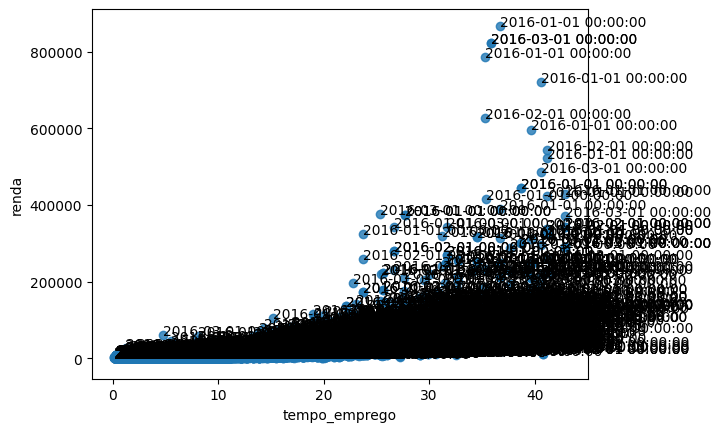

In [38]:
fig, ax = plt.subplots()

# Gráfico de dispersão com linha de regressão
sns.regplot(x='tempo_emprego', y='renda', data=test_data, ax=ax)

# Anotações aos pontos
for i in range(len(test_data)):
    txt = test_data.index[i]
    ax.annotate(str(txt), 
                (test_data.iloc[i]['tempo_emprego'], test_data.iloc[i]['renda']))
plt.show()

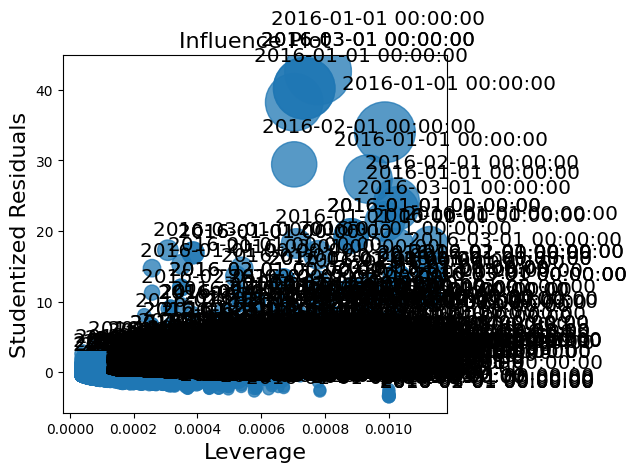

In [39]:
reg = smf.ols('renda ~ tempo_emprego', data=test_data).fit()

fig = sm.graphics.influence_plot(reg, criterion="cooks")
fig.tight_layout(pad=1.0)

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.